In [6]:
import pandas as pd
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt


## 1. Máquinas de aprendizaje aplicadas a la medicina

In [7]:
pd.options.mode.chained_assignment = None
headers = ['age','sex','chest_pain','blood_p','serum','blood_s','electro','max_heart', 'angina','oldpeak','slope','vessel','thal','normal']
df = pd.read_csv("heart.dat", header=None, names=headers, sep=' ')
df['sex'][df['sex'] == 0] = 'female'
df['sex'][df['sex'] == 1] = 'male'
df['chest_pain'][df['chest_pain'] == 1] = 'typical angina'
df['chest_pain'][df['chest_pain'] == 2] = 'atypical angina'
df['chest_pain'][df['chest_pain'] == 3] = 'non-anginal pain'
df['chest_pain'][df['chest_pain'] == 4] = 'asymptomatic'
df['blood_s'][df['blood_s'] == 0] = 'lower than 120mg/ml'
df['blood_s'][df['blood_s'] == 1] = 'greater than 120mg/ml'
df['electro'][df['electro'] == 0] = 'normal'
df['electro'][df['electro'] == 1] = 'ST-T wave abnormality'
df['electro'][df['electro'] == 2] = 'left ventricular hypertrophy'
df['angina'][df['angina'] == 0] = 'no'
df['angina'][df['angina'] == 1] = 'yes'
df['slope'][df['slope'] == 1] = 'upsloping'
df['slope'][df['slope'] == 2] = 'flat'
df['slope'][df['slope'] == 3] = 'downsloping'
df['thal'][df['thal'] == 3] = 'normal'
df['thal'][df['thal'] == 6] = 'fixed defect'
df['thal'][df['thal'] == 7] = 'reversable defect'

> a) Visualice los datos trabajados describiendo el comportamiento de las variables para entender el problema al que se enfrenta. ¿Qué ocurre con el comportamiento entre pacientes sanos y enfermos? Haga gráficos si estima conveniente (histogramas, boxplots, etc).

In [8]:
df.head()

,age,sex,chest_pain,blood_p,serum,blood_s,electro,max_heart,angina,oldpeak,slope,vessel,thal,normal
0,70.0,male,asymptomatic,130.0,322.0,lower than 120mg/ml,left ventricular hypertrophy,109.0,no,2.4,flat,3.0,normal,2
1,67.0,female,non-anginal pain,115.0,564.0,lower than 120mg/ml,left ventricular hypertrophy,160.0,no,1.6,flat,0.0,reversable defect,1
2,57.0,male,atypical angina,124.0,261.0,lower than 120mg/ml,normal,141.0,no,0.3,upsloping,0.0,reversable defect,2
3,64.0,male,asymptomatic,128.0,263.0,lower than 120mg/ml,normal,105.0,yes,0.2,flat,1.0,reversable defect,1
4,74.0,female,atypical angina,120.0,269.0,lower than 120mg/ml,left ventricular hypertrophy,121.0,yes,0.2,upsloping,1.0,normal,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
age           270 non-null float64
sex           270 non-null object
chest_pain    270 non-null object
blood_p       270 non-null float64
serum         270 non-null float64
blood_s       270 non-null object
electro       270 non-null object
max_heart     270 non-null float64
angina        270 non-null object
oldpeak       270 non-null float64
slope         270 non-null object
vessel        270 non-null float64
thal          270 non-null object
normal        270 non-null int64
dtypes: float64(6), int64(1), object(7)
memory usage: 29.6+ KB


In [10]:
df.describe()

,age,blood_p,serum,max_heart,oldpeak,vessel,normal
count,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000
mean,54.433333,131.344444,249.659259,149.677778,1.05000,0.670370,1.444444
std,9.109067,17.861608,51.686237,23.165717,1.14521,0.943896,0.497827
min,29.000000,94.000000,126.000000,71.000000,0.00000,0.000000,1.000000
25%,48.000000,120.000000,213.000000,133.000000,0.00000,0.000000,1.000000
50%,55.000000,130.000000,245.000000,153.500000,0.80000,0.000000,1.000000
75%,61.000000,140.000000,280.000000,166.000000,1.60000,1.000000,2.000000
max,77.000000,200.000000,564.000000,202.000000,6.20000,3.000000,2.000000


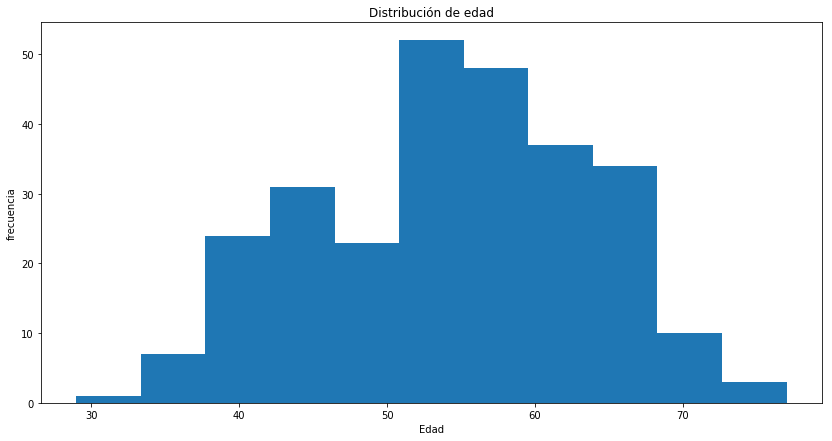

In [11]:
#boxplot distribución de edad
x = df['age']

plt.figure(figsize=(14,7))
plt.hist(x, bins=11)
plt.title('Distribución de edad')
plt.xlabel('Edad')
plt.ylabel('frecuencia')
plt.show()

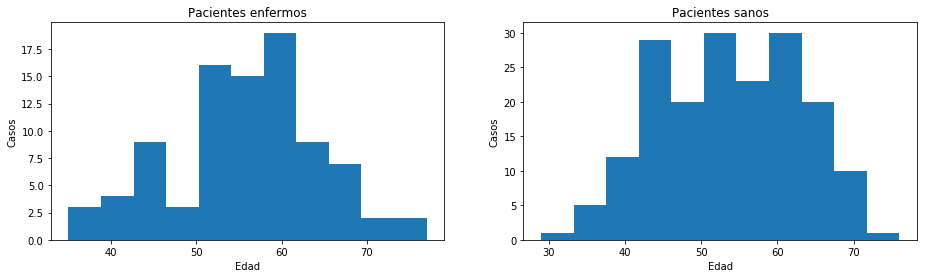

In [12]:
plt.figure(figsize=(24,4))
# casos de angina por edad
x = df[df['angina'] == 'yes']['age']
plt.subplot(1, 3, 1)
plt.hist(x, bins=11)
plt.title('Pacientes enfermos')
plt.xlabel('Edad')
plt.ylabel('Casos')

# casos de angina por edad
x = df[df['angina'] == 'no']['age']
plt.subplot(1, 3, 2)
plt.hist(x, bins=11)
plt.title('Pacientes sanos')
plt.xlabel('Edad')
plt.ylabel('Casos')

plt.show()

> b) Debido a que utilizaremos modelos lineales, necesitaremos una representación adecuada de los datos. Codifique las variables con valores categóricos para ser representados como *one hot vectors*, indicando con un 1 la presencia del atributo en cuestión. Por ejemplo, si un paciente tiene el atributo "sex: female", quedará codificado como [0,1], mientras que si tiene el atributo "sex: male", quedará como [1,0]. **Explique la importancia de éste paso.**

In [13]:
df = pd.get_dummies(df)
df.head()

,age,blood_p,serum,max_heart,oldpeak,vessel,normal,sex_female,sex_male,chest_pain_asymptomatic,...,electro_left ventricular hypertrophy,electro_normal,angina_no,angina_yes,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,70.0,130.0,322.0,109.0,2.4,3.0,2,0,1,1,...,1,0,1,0,0,1,0,0,1,0
1,67.0,115.0,564.0,160.0,1.6,0.0,1,1,0,0,...,1,0,1,0,0,1,0,0,0,1
2,57.0,124.0,261.0,141.0,0.3,0.0,2,0,1,0,...,0,1,1,0,0,0,1,0,0,1
3,64.0,128.0,263.0,105.0,0.2,1.0,1,0,1,1,...,0,1,0,1,0,1,0,0,0,1
4,74.0,120.0,269.0,121.0,0.2,1.0,1,1,0,0,...,1,0,0,1,0,0,1,0,1,0


### Predecir la presión sanguínea
> c) Extraiga la información de la enfermedad cardíaca (*clase binaria*) además de la variable continua que nos intereserá predecir en esta instancia (*target*) con un modelo de regresión lineal.

In [14]:
class_label = df.pop("normal").values -1 # 0 means absence, 1 means presence
reg_label = df.pop("blood_p").values
#cuando ejecutas esto la columna normal y blood_p salen de df
X_data = df.values

>d) Cree un conjunto de pruebas para evaluar los modelos construidos en el problema. Extraiga el 30% de los datos del conjunto total para representar el conjunto de pruebas.

In [15]:
np.random.seed(0)
mask_test = np.random.rand(X_data.shape[0]) < 0.30
...
X_train = X_data[~mask_test] 
X_test = X_data[mask_test] 
#label de presión sanguinea
reg_label_train = reg_label[~mask_test] 
reg_label_test = reg_label[mask_test]
#label de clase enfermo/sano
class_label_train = class_label[~mask_test] 
class_label_test = class_label[mask_test]
...
print("Train: ",X_train.shape)
print("Test: ",X_test.shape)

Train:  (184, 24)
Test:  (86, 24)


> e) Realice una estandarización normal de los datos de entrada al modelo (*input*). **Comente la importancia/conveniencia de realizar este paso**. 

In [16]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std.fit(X_train)
Xstd_train = std.transform(X_train) 
Xstd_test = std.transform(X_test)

Al estandarizar los datos se fija la media en 0, y varianza en 1. De esta forma se pueden comparar datos en distintas unidades y magnitudes. Otra razón practica de estandarizar los datos es que ciertos algoritmos sacan ventaja de esta representación para optimizar calculos.

>f) Realice una regresión lineal de mı́nimos cuadrados básica para predecir el nivel de presión sanguínea. Mida los errores de predicción para cada dato en el conjunto de entrenamiento. Utilizando un quantile-quantile plot determine si es razonable la hipótesis de normalidad sobre los residuos del modelo.

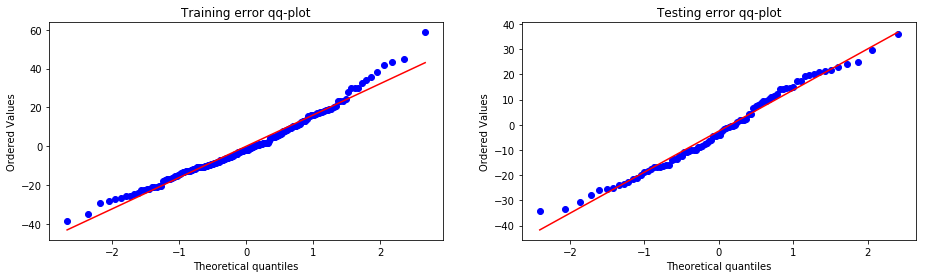

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy import stats
model = LinearRegression(fit_intercept=True)
model.fit(Xstd_train, reg_label_train)
...
reg_pred_train = model.predict(Xstd_train)
reg_pred_test = model.predict(Xstd_test)

# training error
plt.figure(figsize=(24,4))
plt.subplot(1, 3, 1)
reg_error_train = (reg_label_train - reg_pred_train)
res = stats.probplot(reg_error_train, plot=plt)
plt.title('Training error qq-plot')
# test error
plt.subplot(1, 3, 2)
reg_error_test = (reg_label_test - reg_pred_test)
res = stats.probplot(reg_error_test, plot=plt)
plt.title('Testing error qq-plot')
plt.show()

En ambos graficos la diferencia no es lo suficientemente grande para descartar la posibilidad de que los errores sean normales.

>g) Construya una tabla con los pesos, Z-score y F-score correspondientes a cada predictor (variable), compare estos valores. ¿Qué sucede si hacemos un raking de los atributos en base al peso obtenido en la regresión? ¿Qué variables están más correlacionadas con la respuesta?

In [18]:
#las cosas que estan en la diapo de filtro

>h) Para evaluar la calidad de las predicciones del modelo sobre el problema utilice el error absoluto medio (mean absolute error). Comente los resultados sobre en ambos conjuntos y la interpretación que se le da a la métrica de evaluación en el problema.

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print("MSE train: ", mean_squared_error(reg_label_train, reg_pred_train))
print("MSE test: ", mean_squared_error(reg_label_test, reg_pred_test))

MSE train:  259.62929877777003
MSE test:  263.18518886286864


El error absoluto medio indica que tan cerca esta un cojunto de punto respecto al modelo. El error de training es de esperarse ser menor debido a que es la base con la que el modelo esta construido, dependiendo del nivel de overfitting el error de test se separa más de este. En este caso ambos son valores cercanos, lo que indica que no hay mayor sobre-ajuste en el modelo.

>i) Estime la calidad del modelo usando validación cruzada con un número de fold igual a 𝐾=1 (leave-one-out) y 𝐾=5. Recuerde que para que la estimación sea razonable, en cada configuración (fold) deberá reajustar los pesos del modelo. Compare esta estimación vs la calidad real (en conjunto de pruebas) y concluya.

In [20]:
from sklearn.model_selection import KFold

def k_cross(K):
    kf = KFold(n_splits=K)
    mse_cv = 0
    for train, val in kf.split(Xstd_train):
        linreg = LinearRegression(fit_intercept=True)
        linreg.fit(Xstd_train[train], reg_label_train[train])
        yhat_kfold_val = linreg.predict(Xstd_train[val])
        mse_fold =  np.mean( np.square(yhat_kfold_val - reg_label_train[val]) )
        mse_cv += mse_fold
    mse_cv = mse_cv / K
    return mse_cv

print(k_cross(1+1))
print(k_cross(1+5))
##no cache bien como hacer esto

388.7095253280655
371.6168635726652


>j) Debido a la creación de varias columnas dummys en el punto b), experimente con técnicas de regularización para mejorar el desempeño de su modelo. Para ésto ajuste un modelo lineal utilizando "Ridge Regression", es decir, regularizando con la norma 𝑙2, varíe los parámetros de regularización si estima conveniente. Construya un gráfico que muestre los coeficientes obtenidos como función del parámetro de regularización. Describa lo que observa. 

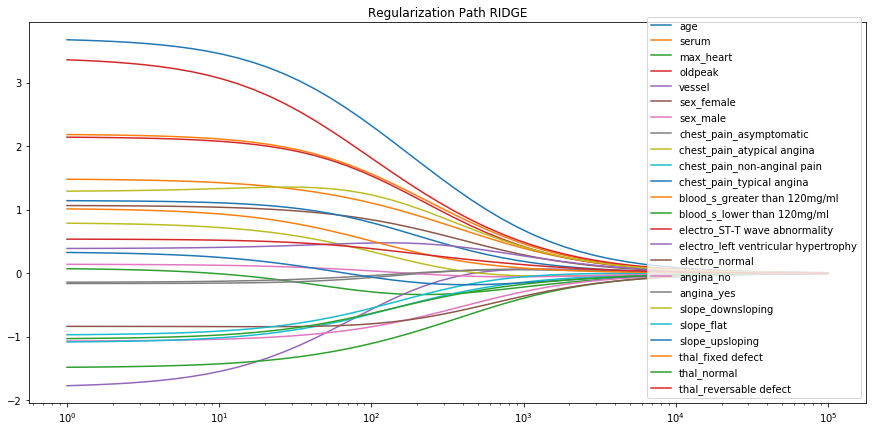

In [49]:
from sklearn.linear_model import Ridge
alphas_ = np.logspace(5,0, base=10)
coefs = []
model = Ridge(fit_intercept=True, solver='svd')
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(Xstd_train, reg_label_train)
    coefs.append(model.coef_)

names_regressors = df.columns
plt.figure(figsize=(15,7))
for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
    plt.plot(alphas_, y_arr, label=label)
plt.legend()
plt.xscale('log')
plt.title('Regularization Path RIDGE')
plt.legend(loc='lower right')
plt.show()

Los atributos no logran ser filtrados de una manera eficiente, estos tienden a decaer de manera sub-lineal y con una curva suave, lo que dificulta que estos lleguen realmente a tener un valor de 0. Graficamente es dificil de distinguir con que puntos quedarse debido al alineamiento de todos los atributos al final. 

>k) Ahora experimente regularizando con la norma 𝑙1, lo que corresponde a utilizar el método "Lasso". Vuelva a realizar el gráfico mostrando los coeficientes obtenidos, describa lo que observa. ¿Es más efectivo Lasso para seleccionar atributos?

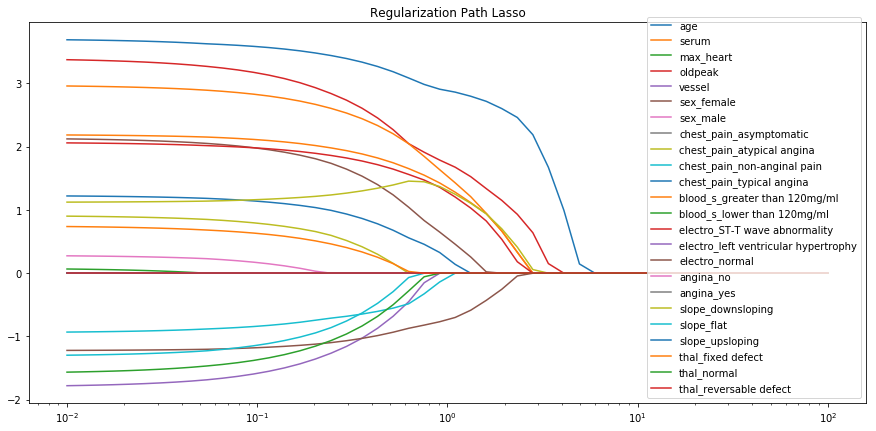

In [48]:
from sklearn.linear_model import Lasso
alphas_ = np.logspace(2,-2,base=10)
coefs = []
model = Lasso(fit_intercept=True)
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(Xstd_train, reg_label_train)
    coefs.append(model.coef_)
    
names_regressors = df.columns
plt.figure(figsize=(15,7))
for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
    plt.plot(alphas_, y_arr, label=label)
plt.legend()
plt.xscale('log')
plt.title('Regularization Path Lasso')
plt.legend(loc='lower right')
plt.show()

A diferencia de regularización con RIDGE, se pueden diferenciar claramente cuando los atributos dejan de ser interesantes. El decaimiento de cada atributo es mucho más forzado y tiende a converger en menos iteraciones (con los correctos párametros). Los atributos alcanzan el valor 0 y no convergen todos en la misma cantidad de iteraciones a diferencia de RIGDE, por lo que la selección es más eficiente.

>l) Evalúe la calidad de estos dos modelos en ambos conjuntos a distintos valores del parámetro de regularización. Haga uso de la widget interactiva de ipython. Comente ¿Con qué valor de alpha se quedaría en cada caso?

In [28]:
from ipywidgets import interactive
def train_model(param, model):
    if model == 1:
        model = Lasso(fit_intercept=True)#define the model (Ridge and Lasso)
    else:
        model = Ridge(fit_intercept=True, solver='svd')
    A = 10**(param)
    print("Param alpha= ",A)
    model.set_params(alpha=A)
    model.fit(Xstd_train, reg_label_train)
    print("MSE train: ", mean_squared_error(reg_label_train, model.predict(Xstd_train) ))
    print("MSE test: ", mean_squared_error(reg_label_test, model.predict(Xstd_test) ))
p_min = -10 #define your range
p_max = 10 #define your range
interactive(train_model, param=(p_min,p_max), model = (0,1))

interactive(children=(IntSlider(value=0, description='param', max=10, min=-10), IntSlider(value=0, description…

Para Ridge usaría alpha = 100, y para Lasso alpha = 0.1. En el caso de Ridge si bien la diferencia entre usar el regulador (Alpha != 0) y no usarlo no es mucho mayor en el error cuadratico, puede que al obtener más data esta decisión sea más relevante para generalizar mejor. Para Lasso esta elección coincide que se minimiza el error cuadratico sin embargo, lo principal es que la diferencia entre el error de training y de test es el mínimo entre el resto de valores de alpha, lo que suguiere que se esta generalizando bien.